# BIA-660-B  Team-7 Project Report_Part 1

## Introduction (Motivation and Objective)

- The goal of automatic Question-Answering is to find out correct answers to the natural language questions raised by users from some specified datasets.[1] The automatic Question-answering (Q&A) system plays a vital role in artificial intelligence.
- Quora is an online knowledge market, a question-and-answer site where questions are asked and answered by its user community. Quora has developed its proprietary algorithm to rank answers. After users typing in keywords in search block, Quora will return ranked correct answers. Particularly, there are 48.7k [2] questions under the topic of Bitcoin on Quora.com.
- Our objective is to find out top matched answers for given questions from our Q&A dataset (scraped from Quora.com) by developing several text analytic models and see which model has the best performance.
- In this case, Support Vector Machine (SVM) is applied as the baseline model, following with Random Forest Model and Convolutional Neural Network Model (CNN) as our machine learning and deep learning models. 
- References: 
> **[1]** https://ieeexplore.ieee.org/xpls/icp.jsp?arnumber=7383065<br>
> **[2]** https://www.quora.com/topic/Bitcoin/all_questions
             

## Related Works
There are bunches of works about Question-Answering System and Information Retrieval. They gave us references and ideas on our project.

- Xiangzhou Huang and others developed a method to integrate Wikipedia data extraction with automated questions answering, which allows them to extract answers and questions from Wikipedia pages in real time. [1]
<img src='reference.png'>
- Their advantages are this model can return answers in a real-time, so the answers are most up-to-date, and the algorithm has higher accuracy. However, different from Wikipedia, the algorithm of ranking pages is more distinct in the knowledge platform like Quora. Firstly, the page ranking algorithm is more complicated as it involves more features like text similarity, view numbers, upvote numbers, etc. Secondly, the goal of Question-answer system in Wikipedia is to find most 'correct' answers, while the goal of our project is to find top 'matched' answers which are based on the associated answers for each question in our dataset. 
- Minwei Zhou, Bing Xiang developed a general CNN-based deep learning framework for answering selection tasks that applied in Apple's Siri, IBM's Watson, etc. However, the difference of our project is that we have more numerical features like answer, upvote and view number as ranking reference. [2]

- Reference: 
> **[1]** Xiangzhou Huang, Baogang Wei and Yin Zhang, "Automatic Question-Answering Based on Wikipedia Data Extraction", Intelligent Systems and Knowledge Engineering (ISKE), 2015 10th International Conference on, Issue Date: 24-27 Nov. 2015.<br>
> **[2]** Minwei Feng, Bing Xiang, Michael R. Glass, Lidan Wang, Bowen Zhou, "Applying Deep Learning to Answer Selection: A Study and An Open Task", Automatic Speech Recognition and Understanding (ASRU), 2015 IEEE Workshop on Date: 13-17 Dec. 2015.

## Web Scraping & Data Preprocessing 
### (Codes of this part will be shown in other files)

- At first, 6788 questions are scraped in the format of links from Quora.com.
- After removing duplicate questions, questions are splited into answered and unanswered ones.
- Extract question parts from http links and transfer them into strings.
- Based on 5973 answered questions, 23389 answers and their corresponding numbers of upvote & view are scraped.
- Selected questions which have at least 5 answers for modeling purpose.
- Transfer units link "k" and "m" into numbers in terms of upvotes and views. 

# Main tasks
### Import Packages

### Exploratory Data Analysis (EDA)
1. How many answered questions
    - 1.1 Proportion of Answered & Unanswered questions
2. How many long & short questions under the topic of Bitcoin
    - 2.1 Distribution of length of questions
    - 2.2 Proportion of short & long questions
3. Question types
    - 3.1 Distribution of Question type
    - 3.2 Proportion of Question types
4. If questions containing ‘Bitcoin’
    - 4.1 Ratio of questions containing 'Bitcoin'
5. Basic analysis of Answer and Upvote
    - 5.1 Distribution of the number of answers
    - 5.2 Distribution of the number of upvotes
6. Correlation Analysis
7. Top 10 words in all answered questions (Using non-stemming& stemming)
    - 7.1 Top 10 keywords distribution using non-stemming
    - 7.2 Wordcloud using non-stemming
    - 7.3 Top 10 keywords distribution using stemming
    - 7.4 Wordcloud using stemming
    
### Three problems we aimed to solve
8. Similar question search engine: The most similar questions in top pairs (or a pair)   
    - 8.1 Demonstration of similar question search engine
    - 8.2 Testing part (Verification for the function: top_pair_question)
9. Searching duplicate questions when entering a new query
    - 9.1 Testing part (Verification for the function: do_research)
10. Classification on tags
    - 10.1 'All tag' classification model performance report
    - 10.2 'Top 5 important tags' classification model performance report

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv 
import nltk
import string
import sys
import datetime
import codecs
import csv
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import normalize
from scipy.spatial import distance
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from itertools import chain
from heapq import nlargest
from collections import defaultdict
#%matplotlib inline

In [2]:
all_links = pd.read_csv("all_link.csv")
answered_links = all_links["Answered"]
unanswered_links = all_links["Unanswered"]
all_links = answered_links + unanswered_links

In [3]:
dic ={}
for each in all_links:
    if each in dic:
        dic[each] = dic[each] +1
    else:
        dic[each]=1

In [4]:
count = 0
for x, y in dic.items():
    if y != 1:
        count +=1
        print('The duplicate links are:', x)
        print('The values are:', y)
        
print('How many duplicate links:', count)

The duplicate links are: nan
The values are: 5156
How many duplicate links: 1


## Exploratory Data Analysis (EDA)

We firstly do some Exploratory Data Analysis (EDA) to get basic understandings of questions and answers.
#### Summary 
- For questions, questions with length between 5 to 20 length has most answers, and ten-length question has most number of answers. 
- Over 73% of questions begin with ‘What’, ‘How’, ’Is’. 
- 81.3% of questions contains ‘bitcoin’. 
- Each question has an average of 6.9 answers. while each answer has average of 7.4 upvotes. 
- The top 8 keywords are “buy”, “invest”, “price”, “ethereum”, “mining/mine”, “best”, “money” and “india”.


### 1. How many answered questions
The proportion of unanswered questions versus total questions is 12%, and the proportion of answered questions versus total questions is 88%.  

In [5]:
def count_question(file_name):
    
    # write csv file and store it as a list object
    file = pd.read_csv(file_name)
    len_answered_q = len(file['Answered'])
    len_unanswered_q = sum(file["Unanswered"].notnull())
    
    # calculations
    total_q = len_answered_q + len_unanswered_q
    proportion_answered_q = len_answered_q / total_q
    proportion_unanswered_q = len_unanswered_q / total_q
    
    return total_q, round(proportion_answered_q,2), round(proportion_unanswered_q,2)

In [6]:
print('The total questions are:', count_question('all_link.csv')[0])
print('The % of answered questions versus total questions is', str(count_question('all_link.csv')[1])+'%')
print('The % of unanswered questions versus total questions is', str(count_question('all_link.csv')[2])+'%')

The total questions are: 6788
The % of answered questions versus total questions is 0.88%
The % of unanswered questions versus total questions is 0.12%


### 1.1 Proportion of Answered & Unanswered questions
- reference1 (pie chart): https://python-graph-gallery.com/140-basic-pieplot-with-panda/
- reference2 (pie chart): https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie

In [7]:
df = pd.DataFrame({'':[count_question('all_link.csv')[1]
                       ,count_question('all_link.csv')[2]
                      ]}, index=['Answered Qs', 'Unanswered Qs'])
df

,
Answered Qs,0.88
Unanswered Qs,0.12


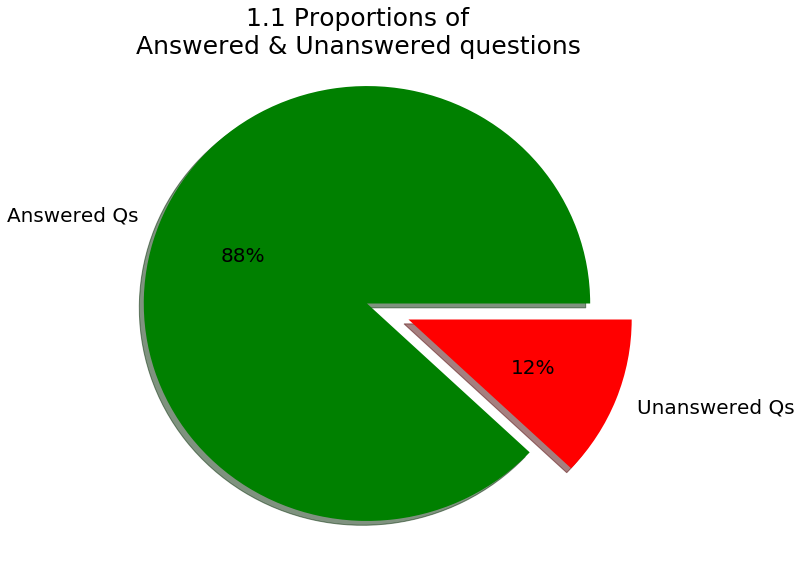

In [8]:
explode = (0, 0.2)

df.plot(kind='pie', subplots=True, figsize=(10,10), legend = False,
        colors = ['green','red'], fontsize=20, autopct='%.f%%',
        shadow = True, explode = explode)
plt.figtext(.5,.85,'1.1 Proportions of\nAnswered & Unanswered questions',fontsize=25,ha='center')
plt.show()

### 2. How many long & short questions under the topic of Bitcoin
- Firstly, we defined a short question if the length of it is less than or equal to ten since askers usually ask a question in length of ten in most situations. Equivalently, a long question contains a length more than ten.
- The proportion of short questions versus total questions is 41% while the proportion of long questions versus total questions is 59%. 
- Reference1 (bar charts using seaborn) https://seaborn.pydata.org/generated/seaborn.barplot.html

In [9]:
def len_question(file_name):
    
    # write csv file and store it as a list object
    link = pd.read_csv(file_name)
    answered_link = link['Answered'].values.tolist()
    unanswered_link = link['Unanswered'][link["Unanswered"].notnull()].values.tolist()
    all_link = answered_link + unanswered_link
    
    # split each link by '/' 
    split_link = []
    for each in all_link:
        split_link.append(each.split('/'))
    
    # append all the questions in the question list
    question = []
    
    for each in split_link:
        if each[3] == 'unanswered':
            question.append(each[4])
        elif each[3] != 'unanswered':
            question.append(each[3])
            
    # split texts by '-' and append them in the list       
    len_question_ls = []
    for each in question:
        len_question_ls.append(each.split('-'))
    
    # create a dictionary to count the length of each question
    dic = {}
    for idx, questions in enumerate(len_question_ls):
        dic[idx] = len(questions)
        
    # summarize the dictionary by counting the frequency of length of questions
    count_dic = {}
    for each in dic.values():
        if each in count_dic:
            count_dic[each] += 1
        else:
            count_dic[each] = 1
    
    return count_dic

In [10]:
len_question('all_link.csv')

{3: 17,
 4: 76,
 5: 193,
 6: 320,
 7: 496,
 8: 539,
 9: 553,
 10: 576,
 11: 496,
 12: 456,
 13: 355,
 14: 308,
 15: 321,
 16: 269,
 17: 235,
 18: 184,
 19: 166,
 20: 149,
 21: 124,
 22: 126,
 23: 88,
 24: 84,
 25: 65,
 26: 72,
 27: 60,
 28: 64,
 29: 49,
 30: 40,
 31: 32,
 32: 32,
 33: 25,
 34: 33,
 35: 14,
 36: 29,
 37: 19,
 38: 24,
 39: 16,
 40: 20,
 41: 13,
 42: 11,
 43: 13,
 44: 6,
 45: 5,
 46: 6,
 47: 2,
 48: 1,
 49: 3,
 50: 3}

### 2.1 Distribution of length of questions
- There are 2,770 short questions and 4,018 long questions.
- From the bar chart, ten-length questions have the most number of answer.

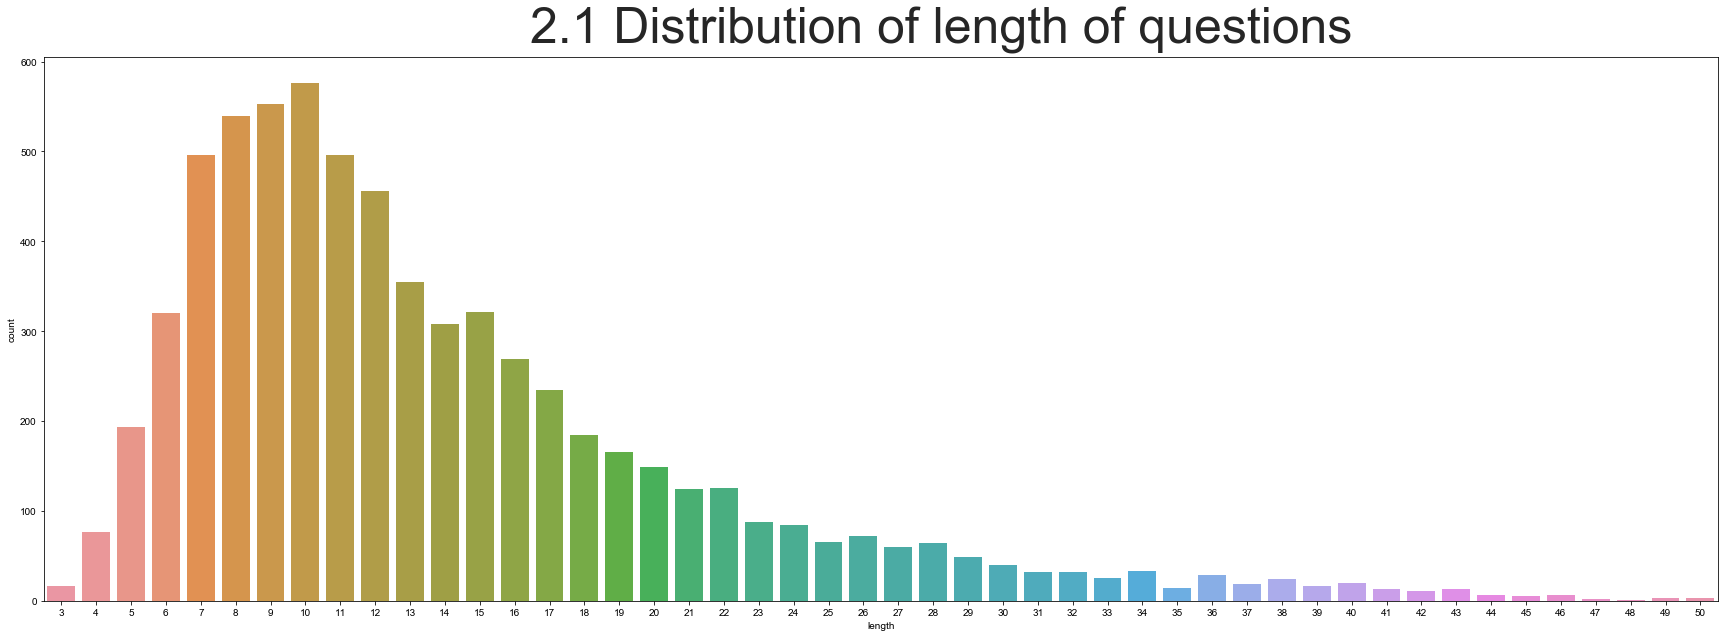

In [11]:
plt.subplots(figsize=(30, 10))
plt.xlabel('length')
plt.ylabel('count')
sns.set(font_scale=2.5)
sns.set_style("whitegrid")
ax = sns.barplot(x=list(len_question("all_link.csv").keys()),
                y=list(len_question("all_link.csv").values()))

plt.figtext(.35,.9,'2.1 Distribution of length of questions',fontsize=50)
plt.show()

In [12]:
short_q_count = []
for (x,y) in len_question("all_link.csv").items():
    if x <= 10:
        short_q_count.append(y)

In [13]:
sum(short_q_count)

2770

In [14]:
long_q_count = []
for (x,y) in len_question("all_link.csv").items():
    if x > 10:
        long_q_count.append(y)   

In [15]:
sum(long_q_count)

4018

### 2.2 Proportion of short & long questions
The proportion of short questions is 41% while the proportion of long questions is 59%. 

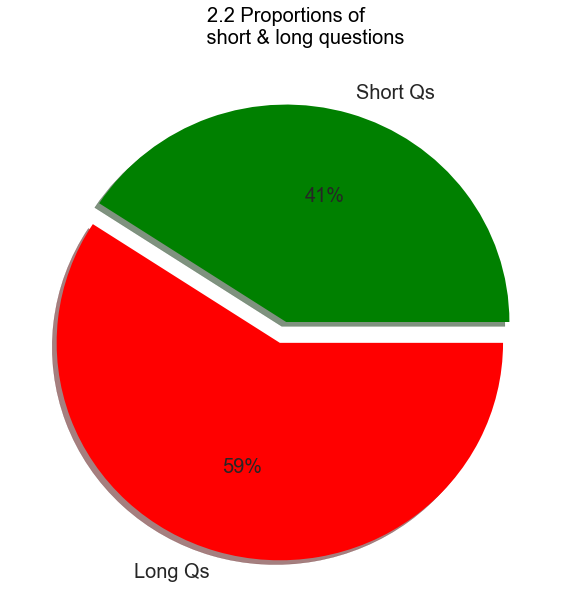

In [16]:
df = pd.DataFrame({'':[sum(short_q_count),sum(long_q_count)]},index=['Short Qs', 'Long Qs'])
explode = (0, 0.1)
df.plot(kind='pie', subplots=True, figsize=(10,10), legend = False, 
        colors = ['green','red'], fontsize=20, autopct='%.f%%',
       shadow = True, explode=explode)
plt.title('2.2 Proportions of\n\
       short & long questions',color = 'black',fontsize=20)
plt.show()

### 3. Question types
- We extracted the first word for each question and examined whether the question belongs to one of our defined question type (who/what/when/which/etc.). We use two figures to show the ratio of each question type.
- As the figures demonstrated, most people ask questions beginning with “what” and “how”. The third one is “is”.

In [17]:
df = pd.read_csv("all_link.csv", header = 0)
df.head()

lst=np.array(df.Answered)
len(lst)

5972

In [18]:
# clear data
arr=[]
for i in range(len(lst)):
    temp=lst[i].replace("https://www.quora.com/","")
    arr.append(temp.lower())

In [19]:
# tokenize
final=[]
for i in range(len(arr)):
    final.append(arr[i].lower().split("-"))

In [20]:
# question type
ls=["is","what","when","where","which","who","why","how","will"]
count=[0,0,0,0,0,0,0,0,0]
for i in range(len(final)):
    if final[i][0] in ls:
        for j in range(len(ls)):
               if final[i][0]==ls[j]:
                    count[j]+=1

result=pd.DataFrame({"number":count},index=ls)
print("Ratio of certain question types to all questions",sum(result.number)/len(arr))

Ratio of certain question types to all questions 0.7513395847287341


### 3.1 Distribution of Question type
- Ranking of question types that have an amount over 200 is: 'What', 'How','Is','Why','Will','Which'. Specifically, 'What' and 'How' question types, each of them has over 1000 questions. This means people mostly ask definition and behavior (about action) related questions.

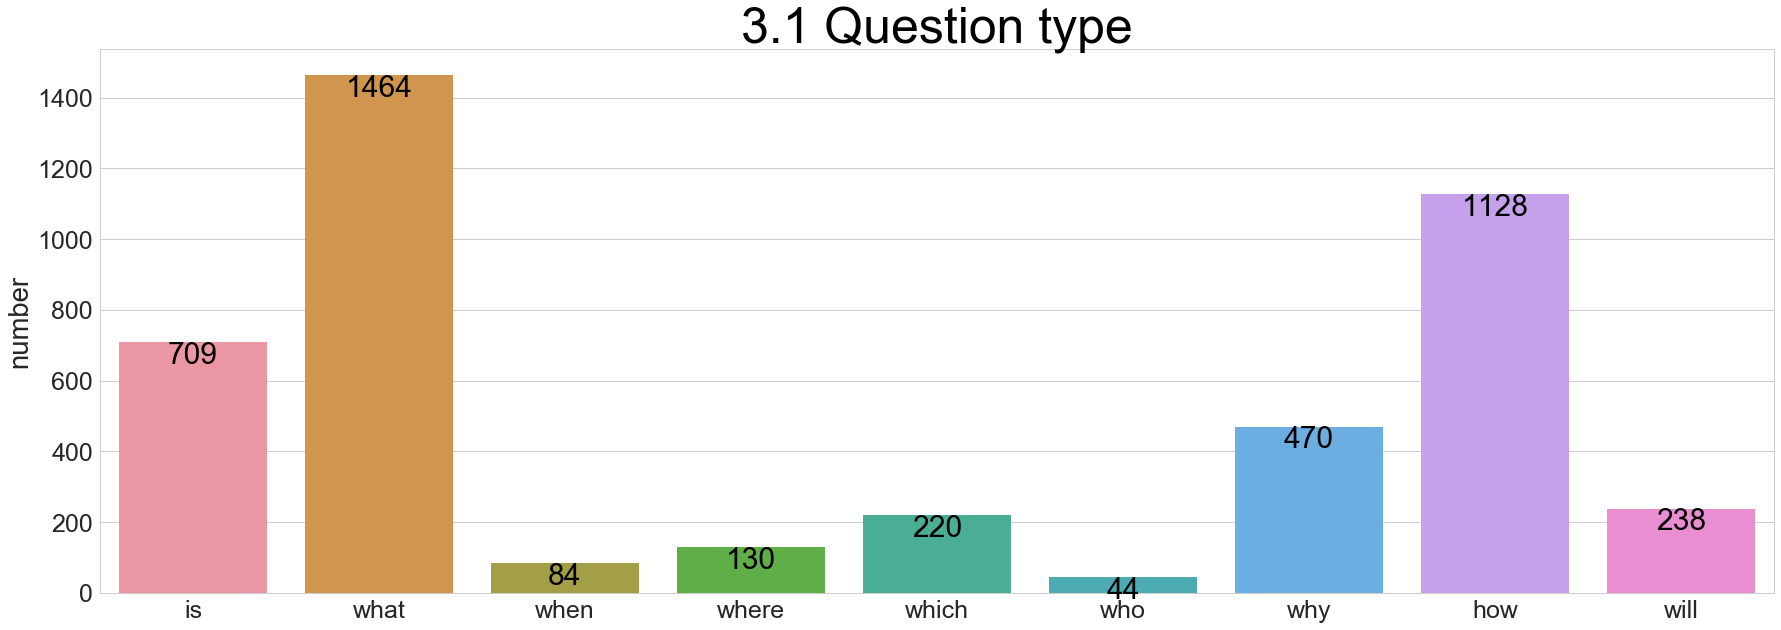

In [21]:
# visualization
plt.subplots(figsize=(30, 10))
sns.barplot(x=result.index,y=result.number)
plt.title('3.1 Question type',color = 'black',fontsize=50)
for i in range(len(result['number'].values)):
    plt.text(i, list(result['number'].values)[i]-60, result['number'].values[i], 
             color='black', ha="center",fontsize=30)
plt.show()

In [22]:
list(result.values[0])[0]

709

### 3.2 Proportion of Question types
- The proportion of Top 4 question type is: 
 'What-32.6%', 'How-25.1%','Is-15.8%','Why-10.5%'
- The proportion of Top 4 Question type versus total question types reached 84%.

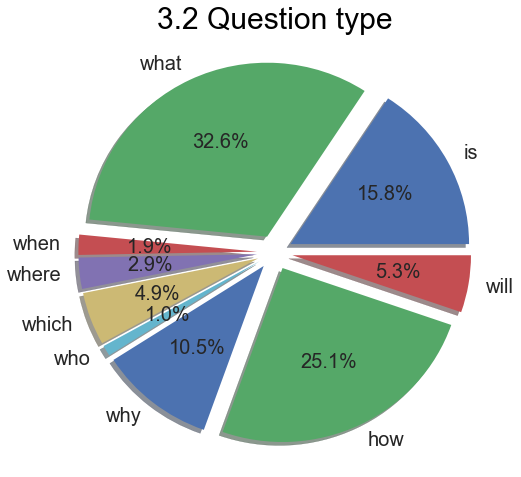

In [23]:
result=pd.DataFrame({"":count},index=ls)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
result.plot(kind='pie', subplots=True, figsize=(8,8), legend = False,
           fontsize=20, autopct='%1.1f%%',
           shadow = True, explode = explode)
plt.title("3.2 Question type",color = 'black',fontsize=30)
plt.show()

### 4. If questions containing ‘Bitcoin’ 
- In all the 5972 answered questions, we have 4857 questions that include the word ‘bitcoin’. In this way, we may set ‘bitcoin’ or related words (Bitcoin/bitcoins, etc.) as stop words during NLP.

In [24]:
# count "bitcoin"
countbit=0
for i in range(len(arr)):
    if "bitcoin" in arr[i]:
        countbit+=1
print(countbit,"questions include 'bitcoin'")

4857 questions include 'bitcoin'


### 4.1 Ratio of questions containing 'Bitcoin'
There are 81.3% questions contain 'Bitcoin', and 18.7% questions doesn't contain 'Bitcoin'.

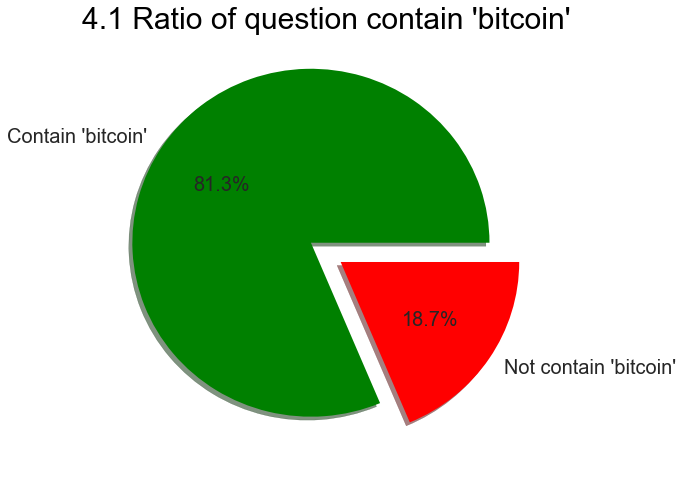

In [25]:
# visualization
notcontain=len(lst)-countbit
ratio=pd.DataFrame({'':[countbit,notcontain]}, index=["Contain 'bitcoin'","Not contain 'bitcoin'"])

explode = (0.1, 0.1)
ratio.plot(kind='pie', subplots=True, figsize=(8,8), legend = False, 
           colors = ['green','red'], fontsize=20, autopct='%1.1f%%',
           shadow = True, explode=explode)
plt.title("4.1 Ratio of question contain 'bitcoin'",color = 'black',fontsize=30)
plt.show()

### 5. Basic analysis of Answer and Upvote

### 5.1 Distribution of the number of answers
- The mean of the number of answers is 6.96. 
- Most questions (1051/6788, around 15 percent questions) have one answer, 50% of questions have no more than 5 answers. Also, we notice that there are 56 questions have over 100 answers.

In [26]:
df_answer= pd.read_csv("answer_count25.csv", header=0)
df_answer.head()
df_answer.info()
df_answer[0:6]

#mean of answer
#print(' The mean of answer is:', df_answer.answer_count.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6788 entries, 0 to 6787
Data columns (total 2 columns):
site            6788 non-null object
answer_count    6788 non-null int64
dtypes: int64(1), object(1)
memory usage: 106.1+ KB


,site,answer_count
0,https://www.quora.com/100-years-from-now-prese...,10
1,https://www.quora.com/20-000-for-bitcoin-cloud...,3
2,https://www.quora.com/A-few-BTCs-were-sent-to-...,3
3,https://www.quora.com/A-man-named-Mukesh-Agarw...,10
4,https://www.quora.com/A-potential-client-may-i...,10
5,https://www.quora.com/A-single-trader-was-repo...,4


In [27]:
# answer count analysis
CBA=df_answer.answer_count.value_counts().reset_index()
CBA.columns=['answers','count_answer']
CBA.sort_values(by='count_answer',ascending=True)
#print(CBA[0:5])
#print(CBA.describe())

,answers,count_answer
83,91,1
73,74,1
74,71,1
75,86,1
76,80,1
82,69,1
78,66,1
79,97,1
80,52,1
81,60,1


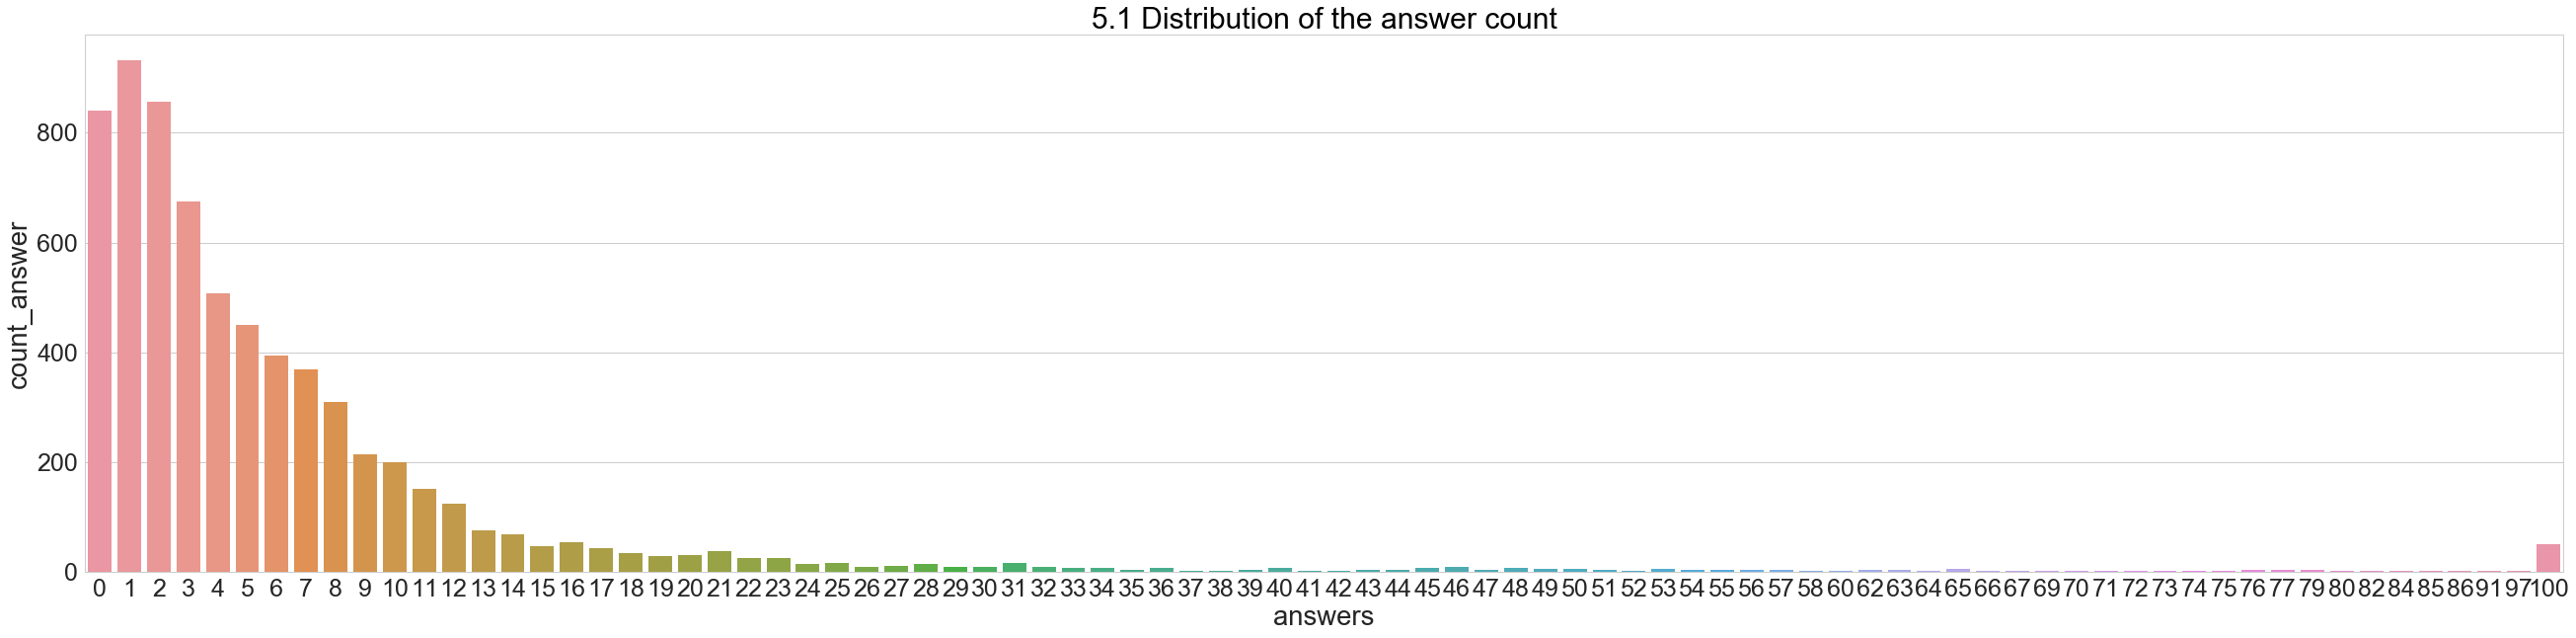

In [28]:
#Barplot
sns.set_style("whitegrid");
plt.figure(figsize=(45, 10));
sns.barplot(x='answers',y='count_answer', data=CBA);
plt.title("5.1 Distribution of the answer count",color = 'black',fontsize=30)
plt.show()

### 5.2 Distribution of the number of upvotes
In this step, we randomly picked out 1000 questions to capture their answers and upvotes of each answer.
- After dropping duplicates from 1000 questions we selected from the last step, 986 questions and 3649 answers left. 
- Each question has an average of 27.5 upvotes. However, we notice that most questions have no upvote. 75% questions have no more than 6 upvotes, and there are couples of questions having an extreme value of upvotes which exceed 500.

In [29]:
#Count of upvote by question
df_upvote= pd.read_csv("answer_upvote.csv", header=0)
df_upvote=df_upvote.drop_duplicates(['answer'])  
df_upvote.head()
df_upvote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3649 entries, 0 to 3682
Data columns (total 3 columns):
question    3649 non-null object
answer      3649 non-null object
upvote      3649 non-null object
dtypes: object(3)
memory usage: 114.0+ KB


In [30]:
# convert upvote  from text to number
upvote=[]
for i in df_upvote.upvote:
    #print(len(i))
    if len(i)<11:
        upvote.append(int(i[0]))
    if len(i)==11:
        upvote.append(int(i[0:2]))
    if len(i)==12:
        upvote.append(int(i[0:3]))
    if len(i)>12:
        upvote.append(int(i[0:4]))
        
#print(len(upvote))
df_upvote['upvotecount']=upvote

df_upvote[0:6]

,question,answer,upvote,upvotecount
0,What is the link to access the Bitcoin private...,To answer you correctly I need to know why you...,0,0
1,What is the link to access the Bitcoin private...,"Ah! You lost it, or you want to crack someone?...",0,0
2,What is the link to access the Bitcoin private...,You generate a paper wallet. Directions here\n...,0,0
3,What are some tips for bitcoin mining?,"January 15, 2018: Bitcoin mining is the proces...",2 Upvoters,2
4,What are some tips for bitcoin mining?,I have written article which can answer this q...,2 Upvoters,2
5,What are some tips for bitcoin mining?,Bitcoin is considered the best cryptocurrency ...,0,0


In [31]:
# Upvotes by question
grouped=df_upvote.groupby('question')
groupsum=grouped.sum()
groupsum[0:3]

value=[]
for i in groupsum.values:
    value.append(int(i))
question=list(groupsum.index)
upvotecount=value
dic={"question":question,\
   "count_upvote":upvotecount}
count_upvote=pd.DataFrame(dic,columns=['question','count_upvote'])
#print(len(count_upvote))
count_upvote[0:3]

,question,count_upvote
0,"""Hold Bitcoin and Ethereum, but buy Bitcoin Ca...",9
1,"$20,000 for bitcoin cloud mining, how much pro...",2
2,"100 years from now, present bitcoin holders wi...",44


In [32]:
CBQ=df_upvote.question.value_counts().reset_index()
CBQ.columns=['question','count_answer']
CBQ[0:3]
#len(count_by_question)

#Merge
CBQ=CBQ.merge(count_upvote,on="question",how="left")
#print(CBQ[0:5])

#print(CBQ.describe())
Top10_Question=CBQ.sort_values('count_upvote',ascending=False)[0:10]

In [33]:
# Upvotes Count
CBU=CBQ.count_upvote.value_counts().reset_index()
CBU.columns=['upvote','count_upvote']
CBU.sort_values(by='count_upvote')
CBU
#print(CBU[0:20])


#Mean
#print(CBU.describe()[['upvote','count_upvote']])

,upvote,count_upvote
0,0,196
1,1,120
2,2,65
3,4,41
4,5,40
5,3,36
6,6,34
7,7,25
8,8,22
9,9,22


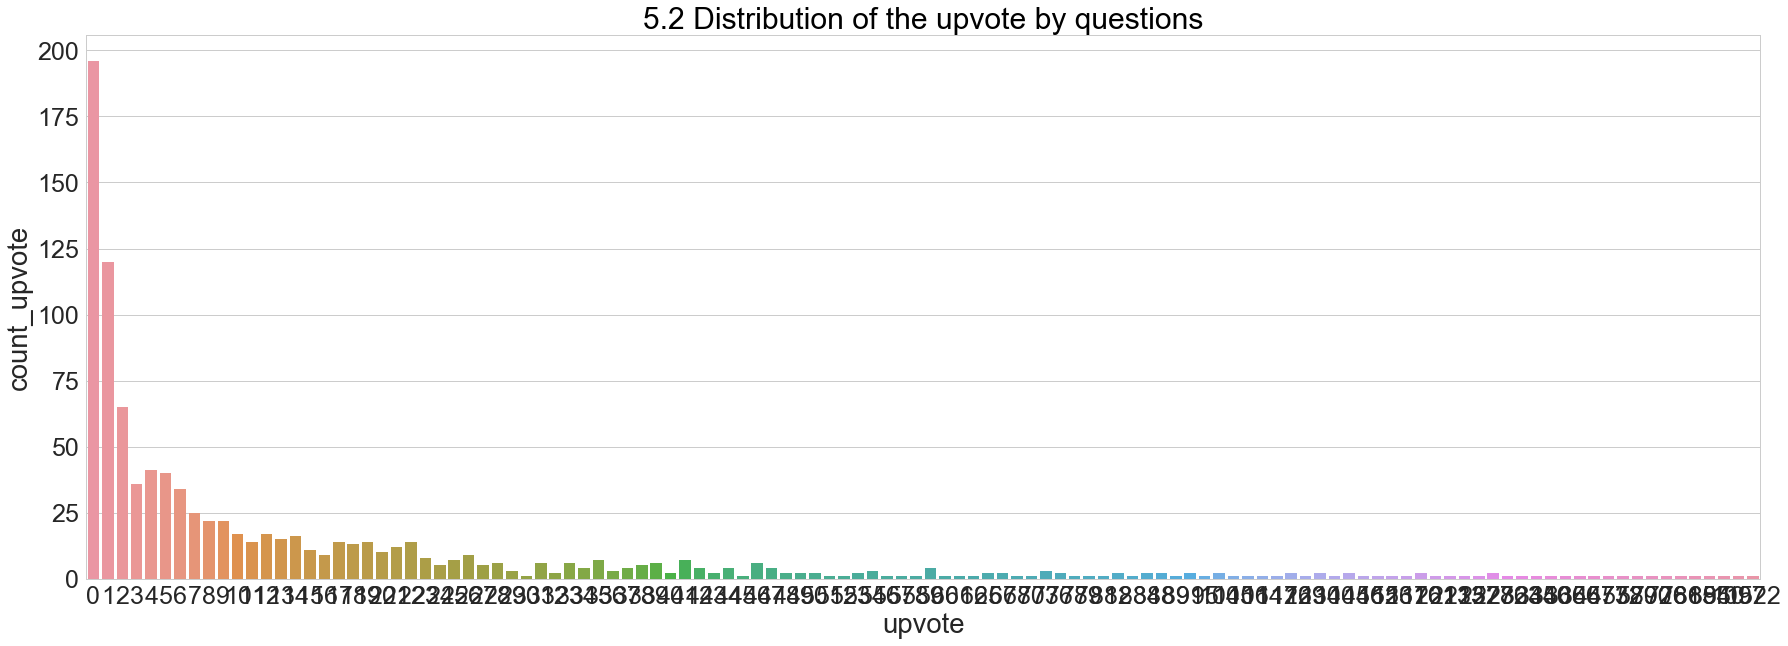

In [34]:
#Barplot
sns.set_style("whitegrid");
plt.figure(figsize=(30,10));
sns.barplot(x='upvote',y='count_upvote', data=CBU);
plt.title("5.2 Distribution of the upvote by questions",color = 'black',fontsize=30)
plt.show();   

In [35]:
# Upvotes by Answer
grouped2=df_upvote.groupby('answer')
groupsum2=grouped2.sum()
groupsum2[0:3]
value=[]
for i in groupsum2.values:
    value.append(int(i))

answer=list(groupsum2.index)
upvotecount2=value

dic2={"answer":answer,\
   "count_upvote":upvotecount2}
count_upvote2=pd.DataFrame(dic2,columns=['answer','count_upvote'])
print(count_upvote2.describe())

#print(len(count_upvote))
count_upvote2.sort_values('count_upvote',ascending=False)[0:10]

       count_upvote
count   3649.000000
mean       7.444779
std       44.777591
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max     1061.000000


,answer,count_upvote
3104,Yes we can :( but we don’t intend to. The prem...,1061
2953,"When I sat down to write this, late last night...",1043
616,Depending on what kind of answer you’re lookin...,927
3264,Yes.\nBuy as many as you can as soon as you ca...,792
1012,I believe Ethereum is a much more viable coin ...,670
2413,The easiest way to get free bitcoins is by usi...,657
796,Found this on MIT Confessions (originally post...,648
2395,"The chances are pretty good, but it is not a s...",638
706,Elon Musk\nThe real life Iron Man. A person wh...,535
1901,No.\nIt’s not even a question of whether he’s ...,449


### 6. Correlation Analysis
In this phase, we still used 986 questions above.
#### Summary
- Compared with questions which do not contain “bitcoin”, questions containing “bitcoin” have more answers and thus have more upvotes.
- The difference between “long” questions and “short” questions is not significant. Short questions have relatively more answers and upvotes.
- In all question types, “How”, ‘Others’, ‘Do’, “Can”, ”As”, ”Are” questions have more answers and upvotes.

In [36]:
# Correlation
# Tag if contain bitcoin (Add tag "if contain 'bitcoin'")
bitcoin=[]
countbit=0
for i in CBQ.question:
    i.lower

for i in range(len(CBQ)):
    if "bitcoin" in CBQ.question[i]:
        countbit+=1
        bitcoin.append('contain')
    elif "Bitcoin" in CBQ.question[i]:
        countbit+=1
        bitcoin.append('contain')
    else:
        bitcoin.append('nocontain')
#print(countbit)
CBQ['bitcoin']=bitcoin
CBQ[0:3]

,question,count_answer,count_upvote,bitcoin
0,How can I earn free cryptocurrency in India? I...,8,6,nocontain
1,How can I expand my knowledge and skills about...,8,6,contain
2,How can I earn more through bitcoin?,8,2,contain


In [37]:
# Tag Question Type
# Find out top 20 begining word
final=[]
for i in range(len(CBQ)):
    final.append(CBQ.question[i].lower().split(" ")[0])
#print(len(final))
setting=[]
for i in final:
    if i not in setting:
        setting.append(i)

count=[0 for i in range(len(setting))]

for i in range(len(final)):
    if final[i] in setting:
        for j in range(len(setting)):
               if final[i]==setting[j]:
                    count[j]+=1
result=pd.DataFrame({"number":count},index=setting)
result.sort_values(by='number',ascending=False)
begining_word=list(result.index)[0:10]

Q_type=[]
for i in range(len(final)):
    if final[i] in begining_word:
        Q_type.append(final[i])
    else:
        Q_type.append('others')
#print(Q_type[0:10])
CBQ['Qtype']=Q_type
CBQ[0:5]

,question,count_answer,count_upvote,bitcoin,Qtype
0,How can I earn free cryptocurrency in India? I...,8,6,nocontain,how
1,How can I expand my knowledge and skills about...,8,6,contain,how
2,How can I earn more through bitcoin?,8,2,contain,how
3,How can I buy Bitcoins in a country and sell t...,7,2,contain,how
4,"As bitcoin has collapsed, is it the best time ...",7,126,contain,as


In [38]:
# Tag Question Length
Q_len=[]
for i in range(len(CBQ)):
    if len(CBQ.question[i].lower().split(" "))>10:
        Q_len.append('long')
    else:
        Q_len.append('short')
len(Q_len)
CBQ['Qlen']=Q_len
CBQ[0:5]
#CBQ.to_csv("/Users/bai/Downloads/660/Project/check.csv",index=False)

,question,count_answer,count_upvote,bitcoin,Qtype,Qlen
0,How can I earn free cryptocurrency in India? I...,8,6,nocontain,how,long
1,How can I expand my knowledge and skills about...,8,6,contain,how,long
2,How can I earn more through bitcoin?,8,2,contain,how,short
3,How can I buy Bitcoins in a country and sell t...,7,2,contain,how,long
4,"As bitcoin has collapsed, is it the best time ...",7,126,contain,as,long


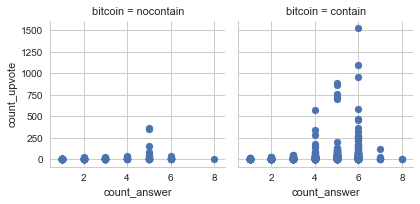

In [39]:
# Visualization 
# Correlation of count answer & upvote between 'bitcoin questions' & 'not-bitcoin' questions
sns.set(font_scale=1)
sns.set_style("whitegrid")
g_bitcoin= sns.FacetGrid(CBQ, col="bitcoin")
g_bitcoin.map(plt.scatter,'count_answer','count_upvote')
plt.show()

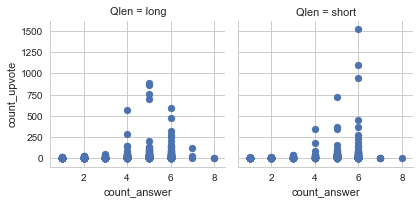

In [40]:
# Visualization 
# "5.4 Correlation of count answer & upvote between 'long questions' & 'short questions'"
sns.set(font_scale=1)
sns.set_style("whitegrid")
g_Qlen= sns.FacetGrid(CBQ, col="Qlen") ;
g_Qlen.map(plt.scatter,'count_answer','count_upvote') ;
plt.show()

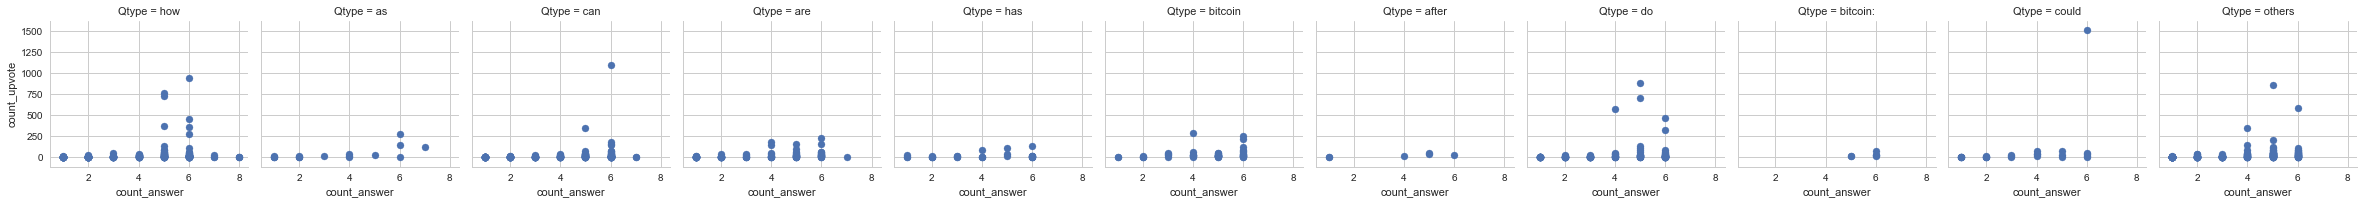

In [41]:
# "5.5 Correlation of count answer & upvote among question types
g_Qtype= sns.FacetGrid(CBQ, col="Qtype")
sns.set_style("whitegrid");
g_Qtype.map(plt.scatter,'count_answer','count_upvote') ;
plt.show()
plt.savefig('cor_Qtype.png')

### 7. Top 10 words in all answered questions (Using non-stemming& stemming)
#### Summary
- We tried to find top 10 keywords with and without stemming. The top keywords were based on total frequencies they appeared in the corpus. 
- There are 8 words in common by using two different methods. They are “**buy**”, “**invest**”, “**price**”, “**ethereum**”, “**mining/mine**”, “**best**”, “**money**” and “**india**”. It’s noteworthy that “mining/mine” ranked as the third place when we do stemming whereas it only ranks fifth without stemming. Hence, it’s necessary to use stemming when the corpus contains couples of keywords which appear in different tenses. 

In [42]:
df = pd.read_csv("all_link.csv", header = 0)

# data clearing
lst=np.array(df.Answered)
arr=[]
for i in range(len(lst)):
    temp=lst[i].replace("https://www.quora.com/","")
    arr.append(temp.lower())
    
# tokenize
token=[]
for i in range(len(arr)):
    token.append(arr[i].lower().split("-"))
    
# remove stop word in token 
def filtered(token):
    stop_words = stopwords.words('english') 
    stop_words+=["bitcoin", "cryptocurr", "bitcoins", "cryptocurrency","blockchain","cryptocurrencies","would","btc"] 
    filtered=[word for word in token \
                if word not in stop_words]
    return filtered

filteredtoken=[filtered(question) for question in token]

# combine all the token
from itertools import chain
alltoken = list(chain(*filteredtoken))

In [43]:
# Create vocabulary 
vocabulary= set(alltoken)
len(vocabulary)
# for non-stemming
count=[]
for x in range(len(filteredtoken)):
    row=[]
    for j in vocabulary:
        status=j in filteredtoken[x]
        row.append(status)
    count.append(row)
np.array(count).shape 

(5972, 5114)

In [44]:
# result of non-stemming
df1=pd.DataFrame(count,columns=list(vocabulary))
finalcount=df1.sum(axis=0)
top_words=finalcount.sort_values(ascending=False)[0:10]
print(top_words)

buy         536
invest      416
price       392
ethereum    327
mining      309
best        297
india       294
money       285
much        222
like        210
dtype: int64


### 7.1 Top 10 keywords distribution using non-stemming
- Figure 7.1 showed the result of top 10 keywords without stemming.

Text(0.5,1,'7.1 Top 10 keywords using non-stemming')

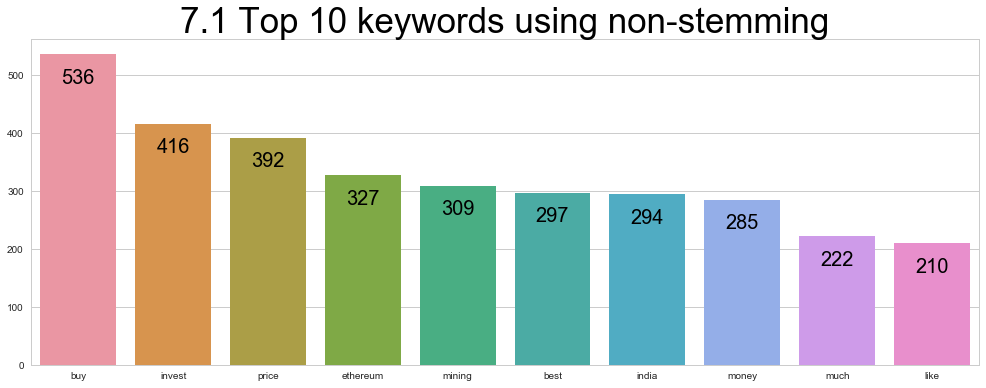

In [45]:
# visualization for top 10 words non-stemming
plt.figure(figsize = (17,6))
sns.barplot(x=top_words.index,y=top_words)

for i in range(len(top_words.values)):
    plt.text(i,top_words.values[i]-50,top_words.values[i], color='black', ha="center",fontsize=20)
    
plt.title('7.1 Top 10 keywords using non-stemming',color = 'black',fontsize=35)

### 7.2 Wordcloud using non-stemming
- Figure 7.2 is the word cloud visualization of top 50 keywords generated by the same method. 

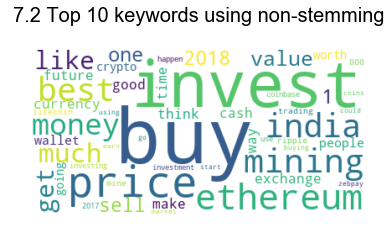

In [46]:
# Word Cloud
all_words=finalcount.sort_values(ascending=False)
wc=WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(dict(all_words))
wc.to_file("bitcoin.png")
plt.imshow(wc, interpolation='bilinear')
plt.title('7.2 Top 10 keywords using non-stemming\n',color = 'black',fontsize=20)
plt.axis("off")
plt.figure()

### 7.3 Top 10 keywords distribution using stemming
- We are also interested in the difference of top 10 keywords between stemming and non-stemming methods. Figure 7.3 is the result of top 10 keywords after stemming.

In [47]:
# stemming token list
porter_stemmer = PorterStemmer()
stemtoken=[]
for doc in filteredtoken:
    stemtoken.append([porter_stemmer.stem(word) for word in doc])

In [48]:
# stemming all token
alltoken=[porter_stemmer.stem(token) for token in alltoken]

In [49]:
# Create vocabulary 
vocabulary= set(alltoken)
len(vocabulary)

3700

In [50]:
# for stemming
count=[]
for x in range(len(stemtoken)):
    row=[]
    for j in vocabulary:
        status=j in stemtoken[x]
        row.append(status)
    count.append(row)
np.array(count).shape

(5972, 3700)

In [51]:
# result of stemming
df1=pd.DataFrame(count,columns=list(vocabulary))
finalcount=df1.sum(axis=0)
top_words=finalcount.sort_values(ascending=False)[0:10]
print(top_words)

invest      706
buy         639
mine        475
price       464
ethereum    331
use         313
best        297
india       295
money       286
exchang     260
dtype: int64


Text(0.5,1,'7.3 Top 10 keywords using stemming')

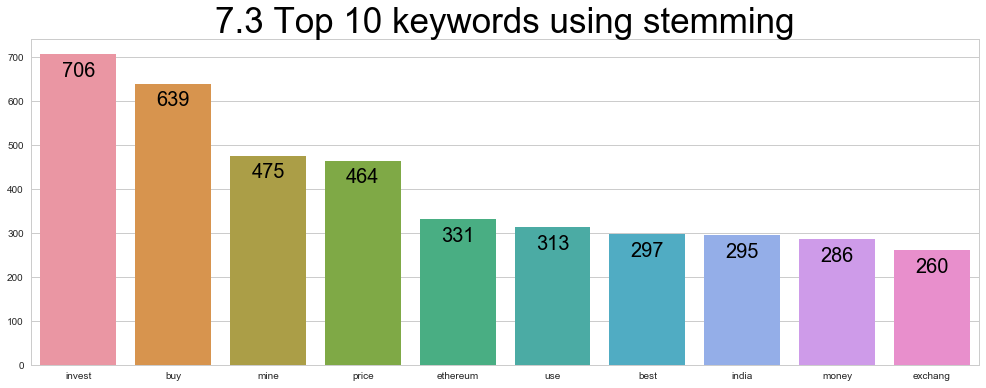

In [52]:
# visualization for top 10 words using stemming
plt.figure(figsize = (17,6))
sns.barplot(x=top_words.index,y=top_words)
for i in range(len(top_words.values)):
    plt.text(i,top_words.values[i]-50,top_words.values[i], color='black', ha="center",fontsize=20)
plt.title('7.3 Top 10 keywords using stemming',color = 'black',fontsize=35)

### 7.4 Wordcloud using stemming
- Figure 7.4 shows the corresponding visualization result using the word cloud. 

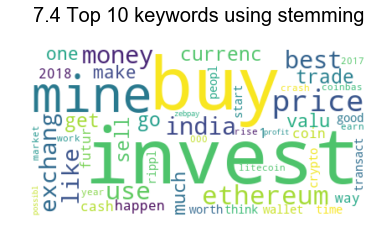

In [53]:
# Word Cloud
all_words=finalcount.sort_values(ascending=False)
wc=WordCloud(background_color="white", max_words=50)
wc.generate_from_frequencies(dict(all_words))
wc.to_file("bitcoin.png")
plt.imshow(wc, interpolation='bilinear')
plt.title('7.4 Top 10 keywords using stemming\n',color = 'black',fontsize=20)
plt.axis("off")
plt.figure()

## Three problems we aimed to solve

### 8. Similar question search engine: The most similar questions in top pairs (or a pair) 
- We are able to find pairs of questions which are highly similar to each other. We have compared every pair of questions using the distance measurement, cosine similarity, and find out pairs with the highest similarity. There are a bunch of pairs which have the similarity score 1.0, meaning these two different questions are highly similar to each other. 
- Though it’s easy to remove duplicate questions either in lower or higher case, it’s necessary to find questions with the same meaning but in different expressions. Detecting pairs of questions with high similarity can help us search for best answers. 
- Askers can save searching time on answers for their "unanswered" questions from other "answered" questions which are highly similar to their "unanswered" questions.

In [54]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
all_links = pd.read_csv("all_link.csv")
answered_links = all_links["Answered"]
links = []
for i in range(len(answered_links)):
    clean_link=answered_links[i].replace("https://www.quora.com/","")
    clean_link2=clean_link.replace("-"," ")
    links.append(clean_link2.lower())

In [55]:
def get_link_tokens(link):
    tokens=[token.strip() \
        for token in nltk.word_tokenize(link.lower()) \
        if token.strip() not in stop_words and \
           token.strip() not in string.punctuation]
        
    stemmed_tokens=[porter_stemmer.stem(token) for token in tokens]
    token_count=nltk.FreqDist(stemmed_tokens)
    
    return token_count

def tfidf(links):
    links_tokens={idx:get_link_tokens(link) \
             for idx,link in enumerate(links)}

    dtm=pd.DataFrame.from_dict(links_tokens, orient="index")
    dtm=dtm.fillna(0)
    tf=dtm.values
    link_len=tf.sum(axis=1)
    tf=np.divide(tf.T, link_len).T
    df=np.where(tf>0,1,0)
    smoothed_idf=np.log(np.divide(len(links)+1, np.sum(df, axis=0)+1))+1  
    smoothed_tf_idf=normalize(tf*smoothed_idf)
    return smoothed_tf_idf

def word_list(links):
    links_tokens={idx:get_link_tokens(link) \
             for idx,link in enumerate(links)}
    dtm=pd.DataFrame.from_dict(links_tokens, orient="index")
    word_list=dtm.columns.values
    return word_list

def top_pair_question(pair):
    smoothed_tf_idf=tfidf(links)
    similarity=1-distance.squareform\
    (distance.pdist(smoothed_tf_idf, 'cosine'))
    
    d = defaultdict(list)

    for i in range(len(similarity)):
        for j in range(i):
            d[similarity[i][j]].append((i, j))
        
    top_1_similarity = sorted(d)[::-1][0]
    
    if len(d[top_1_similarity]) >= 5:
        index_top_5_pairs = d[top_1_similarity][0:pair]
    else:
        index_top_5_pairs = d[top_1_similarity][0:len(d[top_1_similarity])]
    
    for each in index_top_5_pairs:
        print('score:', top_1_similarity)
        print(links[each[0]])
        print(links[each[1]])
        print('\n')

### 8.1 Demonstration of similar question search engine
- Here, we just extracted first top 6 pairs illustrating as followings:

In [56]:
top_pair_question(6)

score: 1.0
can i make money trading bitcoins
can i make money trading bitcoin


score: 1.0
how can i mine for bitcoins
do you mine bitcoin


score: 1.0
how can i use bitcoin in india
how can bitcoins be used in india


score: 1.0
how do i become a bitcoin millionaire
can i become a millionaire by bitcoin


score: 1.0
how do i buy bitcoins
how can i buy bitcoin and from where


score: 1.0
how do i buy bitcoins in bulk
how can i buy bitcoin in bulk




### 8.2 Testing part (Verification for the function: top_pair_question)
- Here, we just verified whether the top_pair_question functions well.

In [57]:
smoothed_tf_idf=tfidf(links)
similarity=1-distance.squareform\
(distance.pdist(smoothed_tf_idf, 'cosine'))

In [58]:
d = defaultdict(list)

for i in range(len(similarity)):
    for j in range(i):
        d[similarity[i][j]].append((i, j))

In [59]:
# Gives the top one similarity
top_1_similarity = sorted(d)[::-1][0]

if len(d[top_1_similarity]) >= 5:
    index_top_6_pairs = d[top_1_similarity][0:6]
else:
    index_top_6_pairs = d[top_1_similarity][0:len(d[top_1_similarity])]

In [60]:
index_top_6_pairs

[(317, 316), (986, 545), (1040, 810), (1145, 278), (1169, 841), (1170, 845)]

In [61]:
for each in index_top_6_pairs:
    print(links[each[0]])
    print(links[each[1]])
    print('\n')

can i make money trading bitcoins
can i make money trading bitcoin


how can i mine for bitcoins
do you mine bitcoin


how can i use bitcoin in india
how can bitcoins be used in india


how do i become a bitcoin millionaire
can i become a millionaire by bitcoin


how do i buy bitcoins
how can i buy bitcoin and from where


how do i buy bitcoins in bulk
how can i buy bitcoin in bulk




### 9. Searching duplicate questions when entering a new query
- Imagine that if one day, an asker has a question such as “I want to know how to invest money in bitcoin efficiently” and post this question on Quora website. Can we find the most similar question to this asker based on our 6788 questions (our database)? The answer is "Yes".
- Basically, we determined a score rule that if the score which is computed from the similarity between a new query and the most similar question is larger than 0.7, we concluded that the query is very relevant to the searched question provided by our model.
<img src='score_rule.png'>
- This searching feature reduces the waiting time of response (answer) for askers and provides the closest answers from the most similar question by mapping the question to its answers.

In [62]:
def tokenize(question):
    stop_words = stopwords.words('english')
    tokens=[question.strip() \
        for question in nltk.word_tokenize(question.lower()) \
        if question.strip() not in stop_words and \
           question.strip() not in string.punctuation]
    return tokens

In [63]:
# Original version for searching (do not execute this block)
def do_search(file_name):
    # Read the compared file first
    all_links = pd.read_csv(file_name)
    answered_links = all_links["Answered"]
    
    # First, tokenize the links into questions
    questions = []
    for i in range(len(answered_links)):
        clean_link=answered_links[i].replace("https://www.quora.com/","")
        clean_link2=clean_link.replace("-"," ")
        questions.append(clean_link2.lower())
    
    # Ask a new query
    # If type in an empty query, then exit
    # Else print out the most similar question to the user
    query = input("Search query >> ")
    
    tokenized_query = tokenize(query)
    
    if tokenized_query == []:
        print('Please type your query in')
        sys.exit()
    
    # Second, combine the query with the existing questions
    else:
        Combined_query = [query] + questions
        smoothed_tf_idf=tfidf(Combined_query)
        similarity=1-distance.squareform\
        (distance.pdist(smoothed_tf_idf, 'cosine'))
    
    df_of_similarity = pd.DataFrame(similarity)
    sort_df_of_similarity = df_of_similarity.sort_values(by=0, ascending=False)
    
    most_similar_question = Combined_query[sort_df_of_similarity[0].index[1]]
    score = sort_df_of_similarity[0].values[1]
    print("1. The most similar question is:", most_similar_question) 
    print("2. The associated score is:", score)
    
    if score < 0.5:
        print("3. Conclusion: The query might be irrelvant to any question")
    elif score >= 0.5 and score < 0.7:
        print("3. Conclusion: The query might is relevant to the searched question.")
    else:
        print("3. Conclusion: The query might is very relevant to the searched question.")

In [64]:
def do_search(file_name):
    # Read the compared file first
    all_links = pd.read_csv(file_name)
    answered_links = all_links["Answered"]
    
    # First, tokenize the links into questions
    questions = []
    for i in range(len(answered_links)):
        clean_link=answered_links[i].replace("https://www.quora.com/","")
        clean_link2=clean_link.replace("-"," ")
        questions.append(clean_link2.lower())
    
    original_q = []
    for i in range(len(answered_links)):
        clean_link=answered_links[i].replace("https://www.quora.com/","")
        clean_link2=clean_link.replace("-"," ")
        original_q.append(clean_link2)
    
    
    # Ask a new query
    # If type in an empty query, then exit
    # Else print out the most similar question to the user
    # query = input("Search query >> ")
    while True:
        query = input("Search query >> ")
        if query!='':
            break
        
    tokenized_query = tokenize(query)
    
    if tokenized_query == []:
        print('Please type your query in')
        sys.exit()
    
    # Second, combine the query with the existing questions
    else:
        Combined_query = [query] + questions
        smoothed_tf_idf=tfidf(Combined_query)
        similarity=1-distance.squareform\
        (distance.pdist(smoothed_tf_idf, 'cosine'))
    
    df_of_similarity = pd.DataFrame(similarity)
    sort_df_of_similarity = df_of_similarity.sort_values(by=0, ascending=False)
    
    most_similar_question = Combined_query[sort_df_of_similarity[0].index[1]]
    original_question = original_q[sort_df_of_similarity[0].index[1]-1]+str('?')
    score = sort_df_of_similarity[0].values[1]
    
    
    print("1. The most similar question is:", original_question) 
    print("2. The associated score is:", score)
    
    if score < 0.5:
        print("3. Conclusion: The query might be irrelvant to any question.")
    elif score >= 0.5 and score < 0.7:
        print("3. Conclusion: The query is relevant to the searched question.")
    else:
        print("3. Conclusion: The query is very relevant to the searched question.")

In [65]:
start_time = datetime.datetime.now()

In [66]:
do_search('all_link.csv')

Search query >> I want to know how to invest money in bitcoin efficiently
1. The most similar question is: Why do you want to invest your money in bitcoin?
2. The associated score is: 0.6335737839200478
3. Conclusion: The query is relevant to the searched question.


In [67]:
print("running time for searching new query", datetime.datetime.now()-start_time)

running time for searching new query 0:07:53.538231


### 9.1 Testing part (Verification for the function: do_research)
Here we enter a new question "I want to know how to invest money in bitcoin efficiently", and the function return the most similar question and it's similarity score, as the score is 0.6, means the result is relevant to the searched question.

In [68]:
test_links = ['I want to know how to invest money in bitcoin efficiently'] + links

In [69]:
smoothed_tf_idf=tfidf(test_links)
similarity=1-distance.squareform\
(distance.pdist(smoothed_tf_idf, 'cosine'))

In [70]:
test_df_of_similarity = pd.DataFrame(similarity)
test_sort_df_of_similarity = test_df_of_similarity.sort_values(by=0, ascending=False)
    
most_similar_question = test_links[test_sort_df_of_similarity[0].index[1]]
score = test_sort_df_of_similarity[0].values[1]

In [71]:
print(most_similar_question)
print(score)

why do you want to invest your money in bitcoin
0.6335737839200478


### 10. Classification on tags
- In the Quora website, each question has its tags; therefore, we want to predict the tags of questions based on our training dataset. We selected the first 1200 questions from the link dataset to collect 1198 questions and its corresponding tags from Quora.
<img src='tag.png'>
- We built two classification models using the training dataset and compared the performance using metrics including precision, recall, and f1 scores. 
- The first linear SVC classification model using 'all tags' as the labels while in the second linear SVC classification model, we only selected the top 5 important tags with the sixth tag called 'Other' as our labels.
- The performance of first model is not ideal. The low accuracy might be due to the unbalanced labels. As a result, in the second linear SVC classification model, we used only Top 5 tags and found the model performance increased from around 0.6 to 0.8 in each metric.

In [72]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
with open('tag.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader)
    q = [[rows[0], rows[1:]] for rows in reader] 
len(q)

1198

In [74]:
# question part (x variable)
questions = []
for each in q:
    questions.append(each[0])
len(questions)

1198

In [75]:
# tag part (y target variable)
tags = []
for each in q:
    tags.append(each[1])
len(tags)

1198

In [76]:
# clean part I for tag (removing empty values)
for tag in tags:
    while "" in tag:
        tag.remove("")
len(tags)

1198

In [77]:
# clean part II for tag
clean_tags = []

for i in range(len(tags)):
    tem_tags = []
    for tag in tags[i]:
        
        tem_tags.append(tag.strip())
    
    clean_tags.append(tem_tags)
len(clean_tags)

1198

In [78]:
# Classification model I based on 
mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(clean_tags)

# check size of indicator matrix
print(Y.shape)

# check classes
print(mlb.classes_)

# check # of samples in each class (by column)
# bitcoin is the most used tag
np.sum(Y, axis=0)

(1198, 624)
['1080ti' '13 (age)' '2008 Financial Crisis' '401(k) Retirement Plans'
 'A Billion Dollars' 'ADR' 'Aamir Khan (actor)' 'Academic Research'
 'Ad Blocking' 'Ad Fraud' 'Addresses (geography)' 'Adult Question'
 'Advertising and Advertisements' 'Advice' 'Africa' 'Airbnb (product)'
 'Algorithms' 'Alt Coins' 'Alt Currencies' 'Altcoins' 'Amazon (company)'
 'Amazon Vs. Flipkart' 'Amazon.com (product)' 'Android Applications'
 'Answers (Quora content)' 'AntMiner S9' 'Apple (company)'
 'Ardor (cryptocurrency)' 'Arguments and Argumentation'
 'Ark - Blockchain Technology' 'Ark Cryptocurrency'
 'Artificial Intelligence' 'Arun Jaitley (Minister of Finance' 'Ascension'
 'Asset Management' 'Assets' 'Astrology' 'Asylum Seekers' 'Australia'
 'BBCoin' 'BCH' 'BNSF Railway' 'Balloons' 'Bank Accounts' 'Banking'
 'Banking in India' 'Banks' 'Bans and Banning' 'Bans and Banning in India'
 'Becoming a Millionaire' 'Belfort' 'Berkeley'
 'Berkshire Hathaway (company)' 'Billionaires' 'Binance' 'Biomes'
 

array([   1,    1,    1,    1,    1,    1,    1,    2,    1,    1,    1,
          3,    2,    2,    1,    1,    1,    1,    1,   23,    2,    1,
          1,    1,    1,    3,    1,    2,    2,    2,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    2,
         15,    1,   11,   10,   11,    1,    1,    1,    1,    1,    3,
          1,    1, 1196,    1,    1,    4,    1,    1,    1,    1,    1,
         19,    2,    2,    6,   38,    2,    1,    1,    3,    1,    3,
          1,    2,   10,   97,    1,    2,    1,    2,    1,    1,    1,
          1,    1,   10,   18,    1,    1,    1,   15,    1,    3,    1,
          7,    1,    8,    1,    1,    3,    1,    2,    1,  104,    1,
          2,    1,    3,    1,    1,   36,    1,    2,    1,    2,    1,
          1,    1,    1,    1,   13,    1,   11,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          2,    1,    1,    1,    1,    2,    2,   

In [79]:
# split dataset into train (70%) and test sets (30%)
X_train, X_test, Y_train, Y_test = train_test_split(\
                questions, Y, test_size=0.3, random_state=0)

classifier = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", min_df=2)),
    ('clf', OneVsRestClassifier(LinearSVC()))])

classifier.fit(X_train, Y_train)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 8 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 12 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 14 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 16 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/a

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 297 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 298 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 300 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 306 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 309 is present in all training examples.
  str(classes[c]))
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 312 is present in all training examples.
  str(classes[c]))
/Users/wuc

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...lti_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1))])

### 10.1 'All tag' classification model performance report
- The performance of the first model is not ideal.
- Hence, we noticed that tags might affect the performance of the first classification model and decided to do a transformation on tags. 

In [80]:
# Performance report
from sklearn.metrics import classification_report

predicted = classifier.predict(X_test)

print(predicted.shape)
predicted[0:2]
Y_test[0:2]

print(classification_report\
      (Y_test, predicted, target_names=mlb.classes_))

(360, 624)
                                          precision    recall  f1-score   support

                                  1080ti       0.00      0.00      0.00         0
                                13 (age)       0.00      0.00      0.00         0
                   2008 Financial Crisis       0.00      0.00      0.00         0
                 401(k) Retirement Plans       0.00      0.00      0.00         1
                       A Billion Dollars       0.00      0.00      0.00         0
                                     ADR       0.00      0.00      0.00         0
                      Aamir Khan (actor)       0.00      0.00      0.00         0
                       Academic Research       0.00      0.00      0.00         0
                             Ad Blocking       0.00      0.00      0.00         1
                                Ad Fraud       0.00      0.00      0.00         1
                   Addresses (geography)       0.00      0.00      0.00         0
    

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [81]:
most_fre_tags = np.argsort(np.sum(Y, axis=0))[::-1][0:5]
mlb.classes_[most_fre_tags]

array(['Bitcoin', 'Cryptocurrencies', 'Virtual Currencies',
       'Blockchain (database)', 'Bitcoin Mining'], dtype=object)

In [82]:
# Transformation for original tags
new_tags = []
for i in range(len(clean_tags)):
    tem_tags = []
    for each in clean_tags[i]:
        if each == 'Bitcoin':
            tag = 'Bitcoin'
        elif each == 'Cryptocurrencies':
            tag = 'Cryptocurrencies'
        elif each == 'Virtual Currencies':
            tag = 'Virtual Currencies'
        elif each == 'Blockchain (database)':
            tag = 'Blockchain (database)'
        elif each == 'Bitcoin Mining':
            tag = 'Bitcoin Mining'
        else:
            tag = 'Other'

        tem_tags.append(tag)
    new_tags.append(tem_tags)

In [83]:
len(new_tags)

1198

In [84]:
# Remove duplicate tags
clean_new_tags = []
for each in new_tags:
    unique_ls = list(set(each))
    clean_new_tags.append(unique_ls)
len(clean_new_tags)

1198

In [85]:
# Classification model II based on clean_new_tags
mlb = MultiLabelBinarizer()
Y=mlb.fit_transform(clean_new_tags)

# check size of indicator matrix
print(Y.shape)

# check classes
print(mlb.classes_)

# check # of samples in each class (by column)
# bitcoin is the most used tag
np.sum(Y, axis=0)

(1198, 6)
['Bitcoin' 'Bitcoin Mining' 'Blockchain (database)' 'Cryptocurrencies'
 'Other' 'Virtual Currencies']


array([1196,   97,  104, 1006,  890,  785])

In [86]:
# split dataset into train (70%) and test sets (30%)
X_train, X_test, Y_train, Y_test = train_test_split(\
                questions, Y, test_size=0.3, random_state=0)



classifier = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words="english", min_df=2)),
    ('clf', OneVsRestClassifier(LinearSVC()))])

classifier.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...lti_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1))])

### 10.2 'Top 5 important tags' classification model performance report
- In the second classification model, we only selected the top 5 important tags with the sixth tag called 'Other' as our target labels.
- The performance of the second classification model is improved a lot by the transformation.
Higher precision, recall, and f1-score are higher than the first model. 

In [87]:
# Performance report
from sklearn.metrics import classification_report

predicted = classifier.predict(X_test)

print(predicted.shape)
predicted[0:2]
Y_test[0:2]

print(classification_report\
      (Y_test, predicted, target_names=mlb.classes_))

(360, 6)
                       precision    recall  f1-score   support

              Bitcoin       1.00      1.00      1.00       360
       Bitcoin Mining       0.74      0.49      0.59        35
Blockchain (database)       0.93      0.87      0.90        31
     Cryptocurrencies       0.82      0.97      0.89       289
                Other       0.75      0.85      0.80       257
   Virtual Currencies       0.70      0.83      0.76       227

          avg / total       0.84      0.91      0.87      1199



### 10.3 Validation of second model
- The last step is to validate the second classification model using a cross validation method.We specified the fold equals to five to do a cross validation five times. 
- However, the performance is unsteady especially for the second fold. We noticed that the unsteady performance might be caused by "few training data". It indeed that due to the time limit issue, we only used the first 1200 questions in the classification model.  
- We can definitely try using other advanced classification models with more training data and perform a hyperparameter tuning on each model.

In [88]:
# validation
from sklearn.model_selection import cross_validate
metrics = ['precision_macro', 'recall_macro', "f1_macro"]
cv = cross_validate(classifier, questions, Y, scoring=metrics, cv=5)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label 0 is present in all training examples.
  str(classes[c]))


In [89]:
print("Test data set average precision:")
print(cv['test_precision_macro'])
print("\nTest data set average recall:")
print(cv['test_recall_macro'])
print("\nTest data set average fscore:")
print(cv['test_f1_macro'])

Test data set average precision:
[0.84830899 0.92251919 0.81731092 0.8404187  0.81428508]

Test data set average recall:
[0.8492195  0.63933737 0.80776439 0.85578704 0.80438768]

Test data set average fscore:
[0.84639108 0.73105597 0.8062412  0.83681822 0.80073192]
